In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from collections import Counter
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import pandas as pd
from src.utils_clustering import *

In [75]:
N_CLASSES = 15

In [76]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [77]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

In [78]:
# Calculate the preference
# This uses the median of the pairwise distances as a starting point
# You might need to adjust this based on the performance
pairwise_dist = pairwise_distances(processed_data)
preference = np.percentile(pairwise_dist, 50) * -1 

In [79]:
affinity_propagation_clustering = AffinityPropagation(
    preference=preference,
    damping=0.9,  # Adjust damping factor as needed
    max_iter=2000,  # Increased max iterations
    convergence_iter=30,  # Increased convergence iterations for more stability
    random_state=42
)

labels_pred = affinity_propagation_clustering.fit_predict(processed_data)

In [80]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({14: 352, 12: 351, 11: 351, 13: 349, 10: 346, 8: 341, 9: 340, 7: 335, 6: 334, 5: 328, 4: 327, 3: 319, 1: 316, 2: 314, 0: 297})


In [81]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [82]:
clustering_algorithm_name = 'AffinityPropagation_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

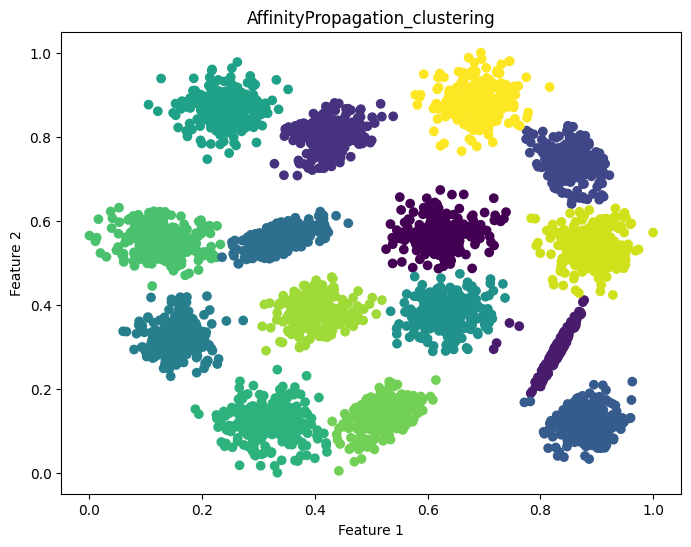

In [83]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [84]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


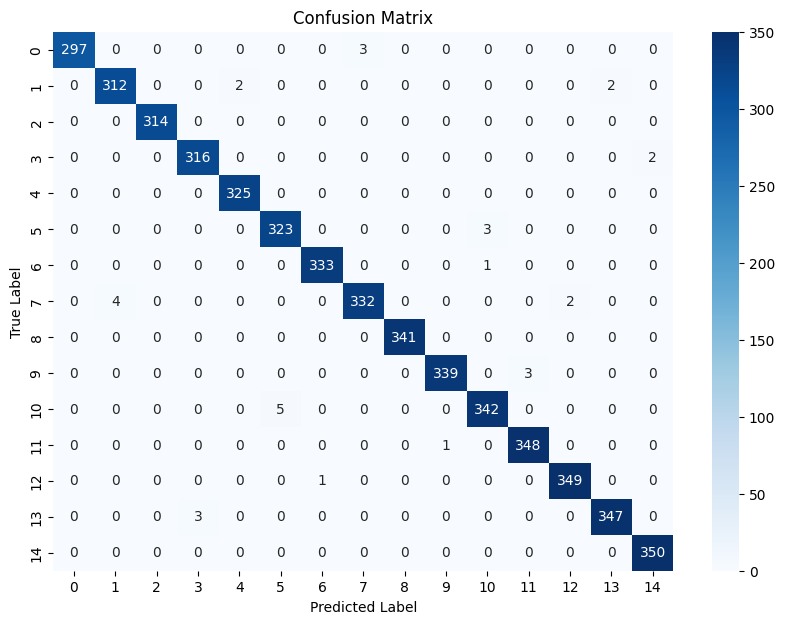

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.00%
Cluster 2 Accuracy: 98.73%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 99.37%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 99.08%
Cluster 7 Accuracy: 99.70%
Cluster 8 Accuracy: 98.22%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 99.12%
Cluster 11 Accuracy: 98.56%
Cluster 12 Accuracy: 99.71%
Cluster 13 Accuracy: 99.71%
Cluster 14 Accuracy: 99.14%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 99.36%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [85]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [86]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path)

Timestamp: 2024-02-07 00:36:05.183914
Dataset: s1
Clustering Algorithm: AffinityPropagation_clustering
Accuracy: 0.9936


In [87]:
# TODO: Save clustering algorithm parameters to the csv